# RayS Attack on 50 images from CIFAR-10

In [1]:
import AttackWrappersRayS

In [2]:
from TransformerModels import VisionTransformer, CONFIGS
import DataManagerPytorch as DMP
from ModelPlus import ModelPlus
from GenerateImage import generateImage
import torch

In [3]:
batchSize = 5
def LoadViTLAndCIFAR10():
    #Basic variable and data setup
    device = torch.device("cuda")
    numClasses = 10
    imgSize = 224
    #Load the CIFAR-10 data
    valLoader = DMP.GetCIFAR10Validation(imgSize, batchSize)
    print("data loaded just fine")
    #Load ViT-L-16
    config = CONFIGS["ViT-L_16"]
    model = VisionTransformer(config, imgSize, zero_head=True, num_classes=numClasses)
    dir = "Models/ViT-L_16,cifar10,run0_15K_checkpoint.bin"
    dict = torch.load(dir)
    model.load_state_dict(dict)
    model.eval()
    print("model loaded just fine")
    #Wrap the model in the ModelPlus class
    modelPlus = ModelPlus("ViT-L_16", model, device, imgSizeH=imgSize, imgSizeW=imgSize, batchSize=batchSize)
    return valLoader, modelPlus

In [4]:
#Load the model and dataset
valLoader, defense = LoadViTLAndCIFAR10()
print("Got model and dataset")
#Get the clean samples
numClasses = 10
attackSampleNum = 50 #Here we select 50 because we were asked to selece 50 samples from the testset
cleanLoader = DMP.GetCorrectlyIdentifiedSamplesBalancedDefense(defense, attackSampleNum, valLoader, numClasses)
print("Got cleanLoader")

Files already downloaded and verified
data loaded just fine
model loaded just fine
Got model and dataset
The length of cleanLoader is 50
Got cleanLoader


showing 10 samples from the 50 clean data samples
saving clean images


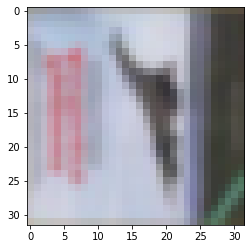

This is the 0 th image
saving clean images


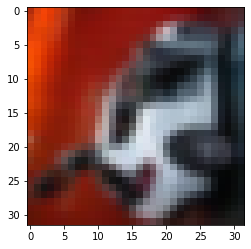

This is the 1 th image
saving clean images


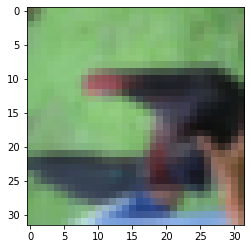

This is the 2 th image
saving clean images


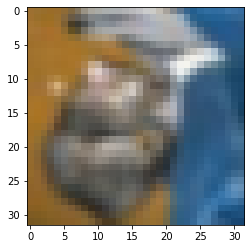

This is the 3 th image
saving clean images


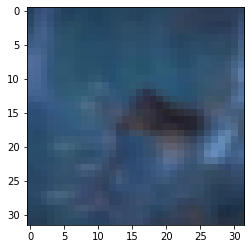

This is the 4 th image
saving clean images


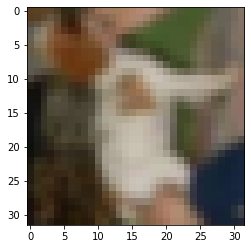

This is the 5 th image
saving clean images


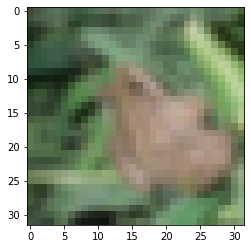

This is the 6 th image
saving clean images


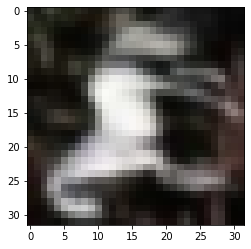

This is the 7 th image
saving clean images


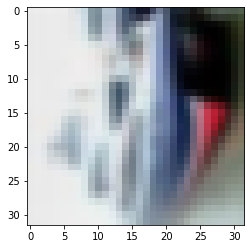

This is the 8 th image
saving clean images


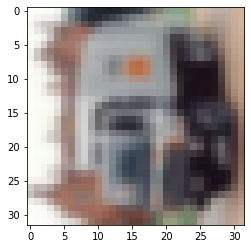

This is the 9 th image


In [5]:
numShowPerClass = 1
print("showing 10 samples from the 50 clean data samples")
generateImage(cleanLoader, 10, "clean", numShowPerClass)

In [6]:
epsMax = 0.031
queryLimit = 10000
#The next line does the actual attack on the defense 
print("Doing the attack Now")
advLoader = AttackWrappersRayS.RaySAttack(defense, epsMax, queryLimit, cleanLoader)
print("Attack Finished")

Doing the attack Now
Generated cleans
generated RayS Object
Going through and attack the samples now
0
So far so good
Time Elapsed: 18.114847421646118
1
So far so good
Time Elapsed: 15.974092960357666
2
So far so good
Time Elapsed: 30.922374486923218
3
So far so good
Time Elapsed: 33.42230486869812
4
out of queries
So far so good
Attack failed, returning clean sample instead.
Time Elapsed: 142.19200992584229
5
So far so good
Time Elapsed: 27.872782468795776
6
So far so good
Time Elapsed: 5.0056376457214355
7
So far so good
Time Elapsed: 3.093844413757324
8
So far so good
Time Elapsed: 23.497435569763184
9
So far so good
Time Elapsed: 1.1364684104919434
10
So far so good
Time Elapsed: 56.667123556137085
11
So far so good
Time Elapsed: 90.63117170333862
12
out of queries
So far so good
Attack failed, returning clean sample instead.
Time Elapsed: 142.29951357841492
13
out of queries
So far so good
Attack failed, returning clean sample instead.
Time Elapsed: 142.19577407836914
14
So far so

showing 10 samples from the 50 adv data samples
saving adv images


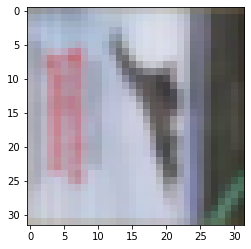

This is the 0 th image
saving adv images


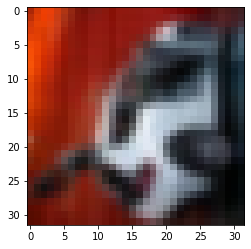

This is the 1 th image
saving adv images


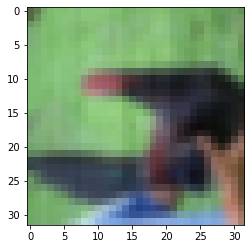

This is the 2 th image
saving adv images


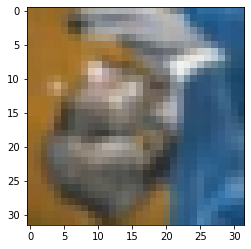

This is the 3 th image
saving adv images


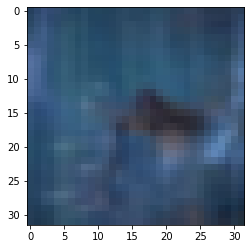

This is the 4 th image
saving adv images


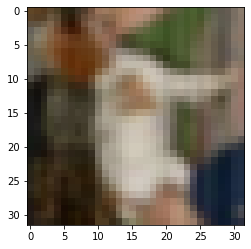

This is the 5 th image
saving adv images


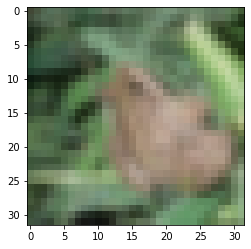

This is the 6 th image
saving adv images


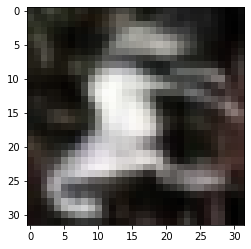

This is the 7 th image
saving adv images


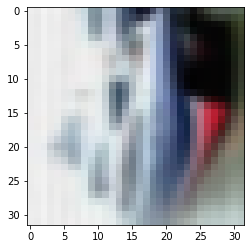

This is the 8 th image
saving adv images


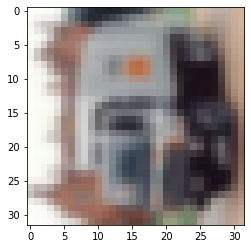

This is the 9 th image


In [7]:
print("showing 10 samples from the 50 adv data samples")
generateImage(advLoader, 10, "adv", numShowPerClass)

In [8]:
#Check the results 
print("Checking results")
robustAcc = defense.validateD(advLoader)
cleanAcc = defense.validateD(cleanLoader)
#Print the results 
print("Queries used:", queryLimit)
print("Robust acc:", robustAcc)
print("Clean acc:", cleanAcc)

Checking results
Queries used: 10000
Robust acc: 0.18
Clean acc: 1.0
